In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load and Visualize
- Download
- Load
- Visualise
- Normalisation

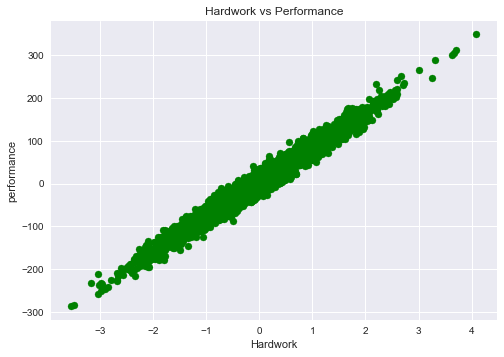

In [2]:
# Load
X = pd.read_csv("./Training-Data/Linear_X_Train.csv")
y = pd.read_csv("./Training-Data/Linear_Y_Train.csv")

# Visualize
plt.style.use("seaborn")
plt.scatter(X,y, color="green")
plt.title("Hardwork vs Performance")
plt.xlabel("Hardwork")
plt.ylabel("performance")
plt.show()

In [3]:
#normalization
u = X.mean()
std = X.std() # if std equivalent to 1 it is already normalized or else
X = (X-u)/std

In [4]:
X = X.values
y = y.values

### 2. Linear Regression

In [5]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*X[i]
        
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - y[i])**2
        
    return total_error/m
        
def gradientDescent(X, Y, max_steps = 100, learning_rate=0.1):
    
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(max_steps):
        
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    return theta, error_list

In [6]:
theta ,error_list = gradientDescent(X,y)

In [7]:
error_list

[array([6576.35005246]),
 array([5363.4315836]),
 array([4380.90940714]),
 array([3585.0192859]),
 array([2940.3100872]),
 array([2418.06469202]),
 array([1995.02085561]),
 array([1652.3350432]),
 array([1374.74308719]),
 array([1149.88027919]),
 array([967.73061192]),
 array([820.18063876]),
 array([700.65807852]),
 array([603.83906797]),
 array([525.41102239]),
 array([461.88054114]),
 array([410.41780204]),
 array([368.73051331]),
 array([334.96180856]),
 array([307.60753691]),
 array([285.44926394]),
 array([267.49999931]),
 array([252.96023344]),
 array([241.18232522]),
 array([231.64165425]),
 array([223.91325284]),
 array([217.65287676]),
 array([212.58167165]),
 array([208.47375211]),
 array([205.14614011]),
 array([202.45061468]),
 array([200.2671097]),
 array([198.49836587]),
 array([197.06559846]),
 array([195.9049881]),
 array([194.964838]),
 array([194.20327129]),
 array([193.58636571]),
 array([193.08664258]),
 array([192.68184285]),
 array([192.35393565]),
 array([192.08

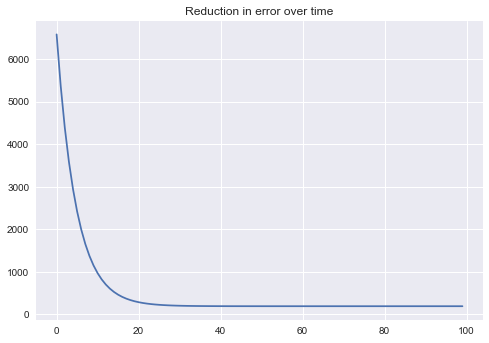

In [8]:
plt.figure()
plt.plot(error_list)
plt.title("Reduction in error over time")
plt.show()

### Prediction and Best Lines

In [9]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733603 ]
 [-43.69571379]
 [ 86.48486934]
 ...
 [-20.85044539]
 [138.70196231]
 [-35.87896974]]


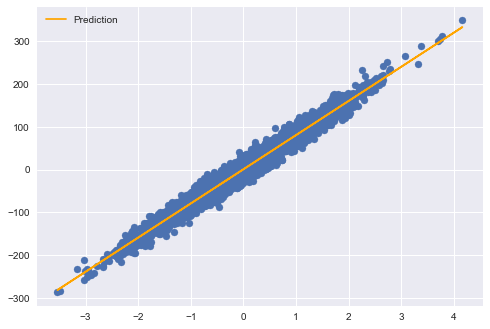

In [10]:
plt.scatter(X,y)
plt.plot(X,y_,color="orange",label="Prediction")
plt.legend()
plt.show()

In [16]:
X_test = pd.read_csv("Linear_X_Test.csv").values
y_test = hypothesis(X_test,theta)

In [17]:
df = pd.DataFrame(data = y_test,columns=["y"])

In [18]:
df.to_csv("y_prediction.csv",index=False)

### How to check the Accuracy of your Model

In [20]:
def r2_score(Y,y_):
    num = np.sum((Y-y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = (1-num/denom)
    
    return score*100

In [21]:
r2_score(y,y_)

97.09612226930929